# Comparison between impulsive and continuous exogenous mortality on pests

In [19]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

In [2]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

#### Continuous model

\begin{cases}
\dot{x} = rx(1-\frac{x}{K})- axy- E_xx\\ 
\dot{y} = \gamma a x y - my\\
\end{cases} 


#### Impulsive model

\begin{cases}
    \dot{x} = rx(1-\frac{x}{K}) - axy\\ 
    \dot{y} = \gamma a x y - my\\
    x(nT^{+}) = e^{-E_xT}x(nT) = x(nT) - (1 - e^{-E_xT})x(nT)
\end{cases}

## 1. Initial value = $(x_0,y_0) = (5,1)$

In [12]:
x0y0_a = [5, 1, 0]

### 1.1 $T = 1$

In [13]:
T = 1

### 1.1.1 $E_c = 0.1$

In [14]:
E_x_c = 0.1 #Continuous taking effort
#E_x_p will equals to 1 - np.exp(-E_x_c*T) #Impulsive taking effort

Solve ODE

In [15]:
#Continuous
xyI_cont = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=0, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x_c},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_cont = xyI_cont[1]
y_cont = xyI_cont[2]
I_cont = xyI_cont[3]

t = xyI_cont[0]

#Impulsive
xyI_imp = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x= 1 - np.exp(-E_x_c*T), #E for impulsive
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_imp = xyI_imp[1]
y_imp = xyI_imp[2]
I_imp = xyI_imp[3]

Plot the evolution of the population

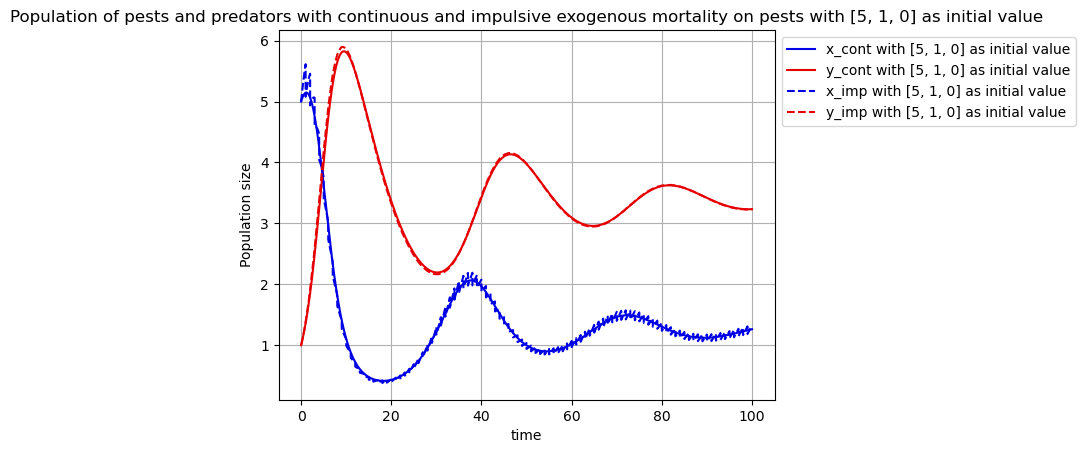

In [16]:
plt.plot(t, x_cont, color = (0,0,0.9), linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, y_cont, color = (0.9,0,0), linestyle='-', label=f'y_cont with {x0y0_a} as initial value')
plt.plot(t, x_imp, color = (0,0,0.9), linestyle='--', label=f'x_imp with {x0y0_a} as initial value')
plt.plot(t, y_imp, color = (0.9,0,0), linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title(f'Population of pests and predators with continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Plot the integral of $x$

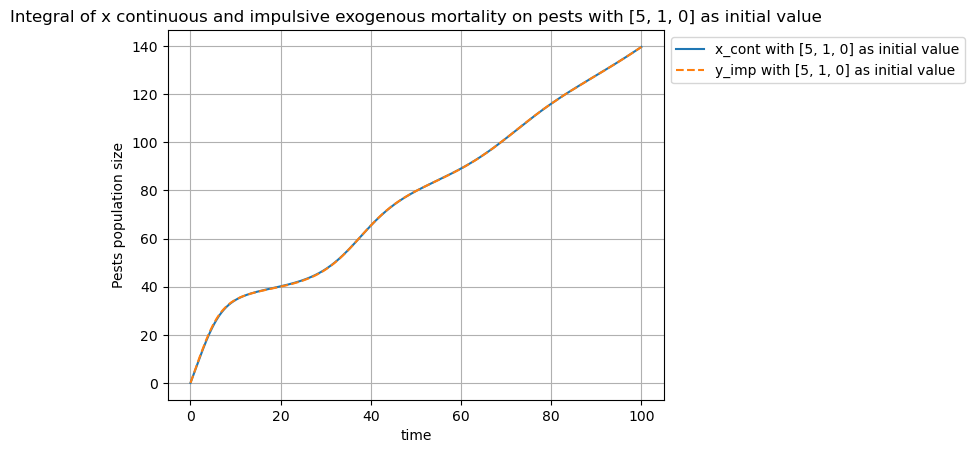

In [17]:
plt.plot(t, I_cont, linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, I_imp, linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Pests population size')
plt.title(f'Integral of x continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Test if we have got the same results with the plot function.

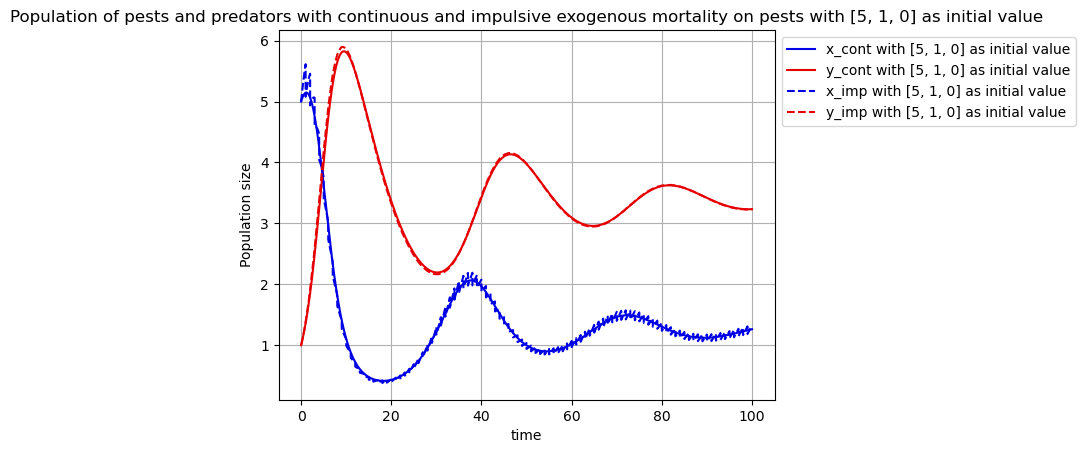

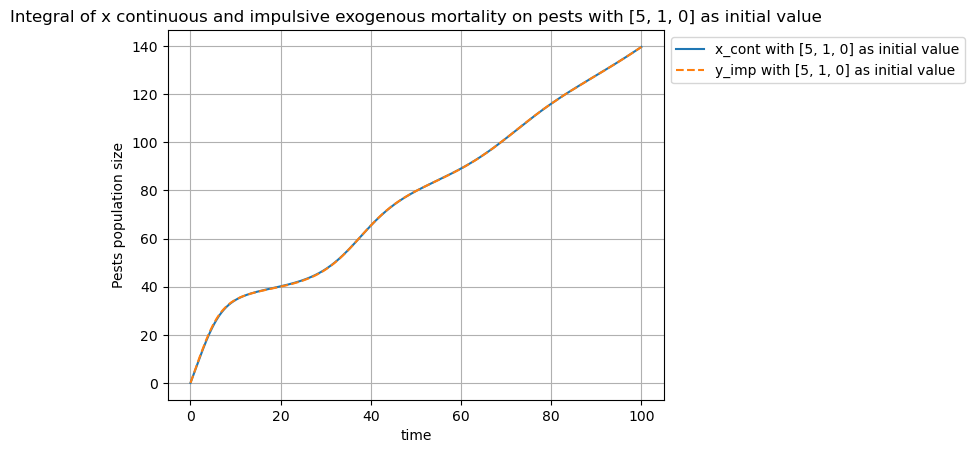

In [18]:
double_exo.plot_pop_mortality_on_x_logistic_LV(
    xyI=x0y0_a,
    t=tt,
    r=r,
    K=K,
    a=a,
    gamma=gamma,
    m=m,
    E_x_c=E_x_c,
    T=T,
    t_0=t_0,
    t_n=t_n
)

### 1.2 $T=2$

In [28]:
T=2

#### 1.2.1 $E_c = 0.1$ 

In [29]:
E_x_c = 0.1

Solve ODE

In [30]:
#Continuous
xyI_cont = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=0, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x_c},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_cont = xyI_cont[1]
y_cont = xyI_cont[2]
I_cont = xyI_cont[3]

t = xyI_cont[0]

#Impulsive
xyI_imp = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x= 1 - np.exp(-E_x_c*T), #E for impulsive
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_imp = xyI_imp[1]
y_imp = xyI_imp[2]
I_imp = xyI_imp[3]

Plot the evolution of the population

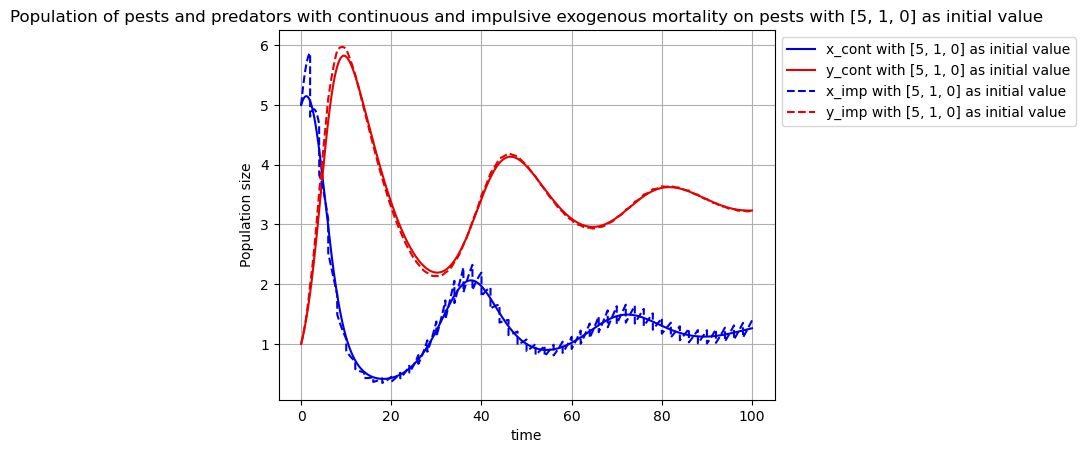

In [31]:
plt.plot(t, x_cont, color = (0,0,0.9), linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, y_cont, color = (0.9,0,0), linestyle='-', label=f'y_cont with {x0y0_a} as initial value')
plt.plot(t, x_imp, color = (0,0,0.9), linestyle='--', label=f'x_imp with {x0y0_a} as initial value')
plt.plot(t, y_imp, color = (0.9,0,0), linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title(f'Population of pests and predators with continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Plot the integral of $x$

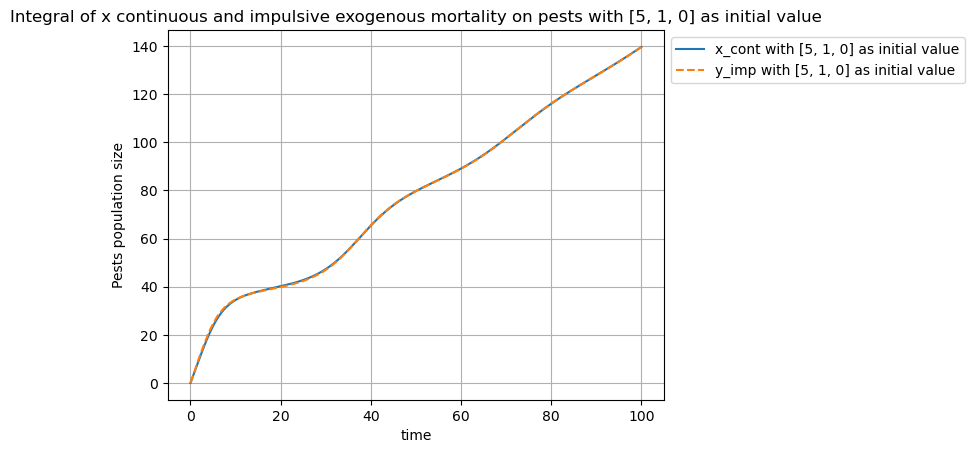

In [32]:
plt.plot(t, I_cont, linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, I_imp, linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Pests population size')
plt.title(f'Integral of x continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 1.3 $T=5$

In [3]:
T=5

#### 1.3.1 $E_c = r + 0.1$ 

In [4]:
E_x_c = r + 0.1

Solve ODE

In [5]:
x0y0_a = [K, 0.1, 0]

In [10]:
t_n = 30

In [11]:
#Continuous
xyI_cont = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=0, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x_c},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_cont = xyI_cont[1]
y_cont = xyI_cont[2]
I_cont = xyI_cont[3]

t = xyI_cont[0]

#Impulsive
xyI_imp = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x= 1 - np.exp(-E_x_c*T), #E for impulsive
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_imp = xyI_imp[1]
y_imp = xyI_imp[2]
I_imp = xyI_imp[3]

Plot the evolution of the population

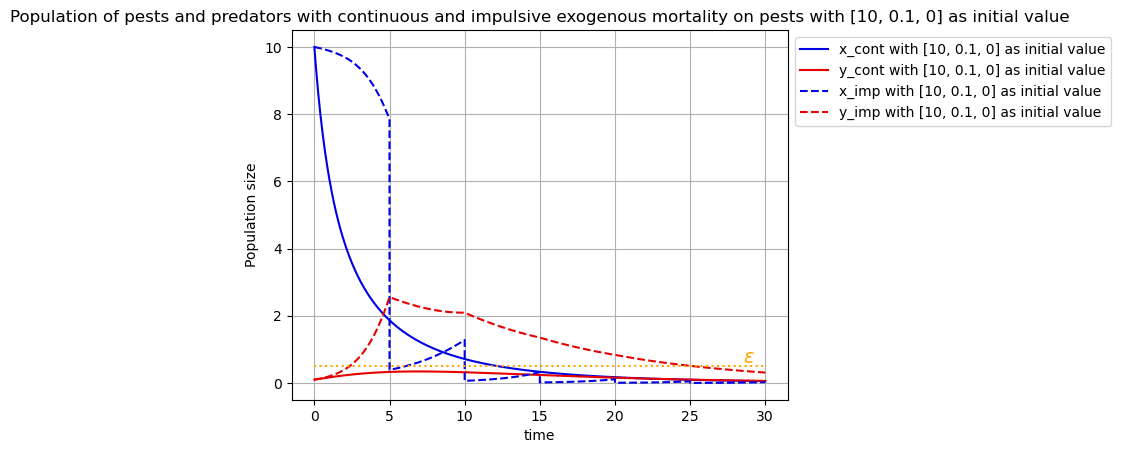

In [18]:
plt.plot(t, x_cont, color = (0,0,0.9), linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, y_cont, color = (0.9,0,0), linestyle='-', label=f'y_cont with {x0y0_a} as initial value')
plt.plot(t, x_imp, color = (0,0,0.9), linestyle='--', label=f'x_imp with {x0y0_a} as initial value')
plt.plot(t, y_imp, color = (0.9,0,0), linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.plot(t, 0.5*np.ones_like(t), color = 'orange', linestyle=':')
plt.text(t[-1]*0.95, .6, r'$\varepsilon$', color='orange', fontsize=14)
plt.xlabel('time')
plt.ylabel('Population size')
plt.title(f'Population of pests and predators with continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

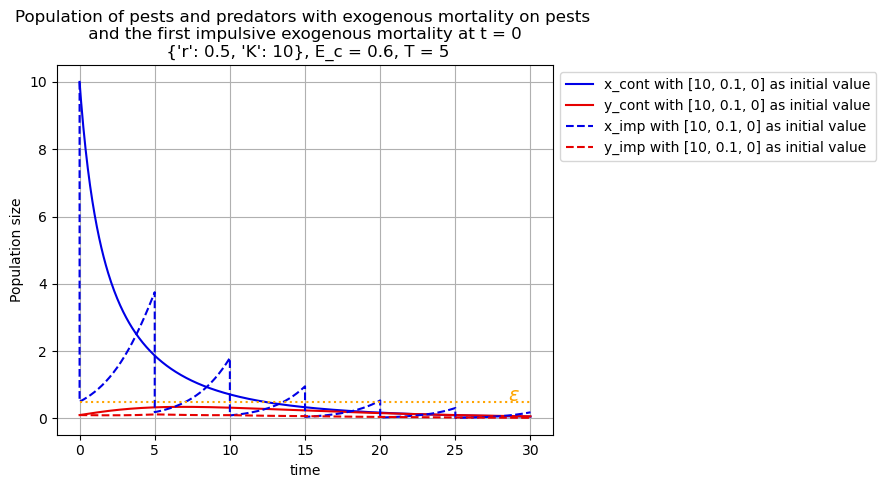

{'T': 5,
 'I_cont_final': 31.71447207499183,
 'I_imp_final': 16.07764257263125,
 'eps': 0.5,
 't_pulse': 0,
 't_eta_cont': 12.25,
 't_eta_imp': 20.0,
 't_eta_imp - t_eta_cont': 7.75}

In [21]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0.1,0],
    xyI0_cont= [K,0.1,0],
    t=tt,
    gamma=gamma,
    E_c=E_x_c,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=30,
    t_pulse=0,
    eps=0.5,
    plot_population=True,
    plot_bound= False,
    t_bound=1,
    plot_eps= True
)

Plot the integral of $x$

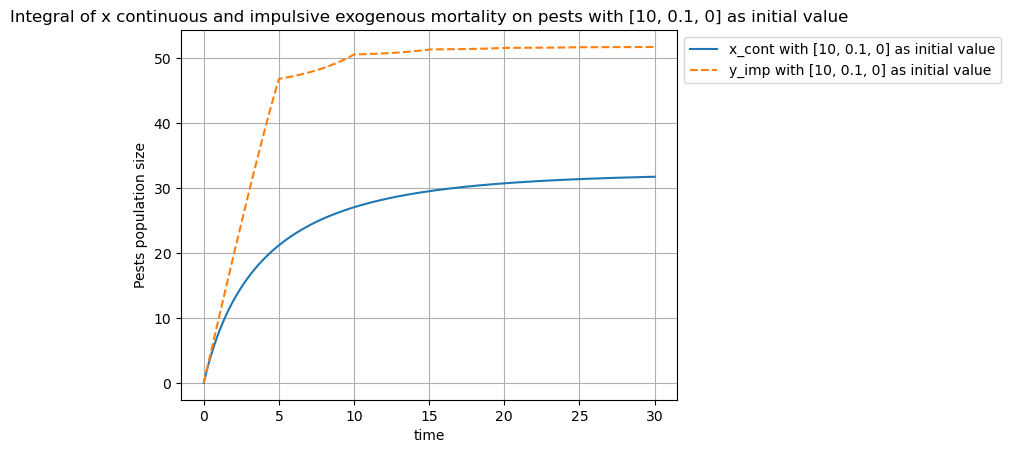

In [13]:
plt.plot(t, I_cont, linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, I_imp, linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Pests population size')
plt.title(f'Integral of x continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()